# Trader Behavior Analysis Using Bitcoin Fear & Greed Index

### Objective
Analyze how trader performance and behavior change under different market sentiment
conditions (Fear vs Greed).

### Datasets
- Historical Trading Data (Hyperliquid)
- Bitcoin Fear & Greed Index

### Methodology
- Timestamp cleaning and date alignment
- Merge trade data with sentiment data
- Performance and behavior analysis
- Visualization of key insights

### Key Findings
- Greed phases show larger trade sizes and higher risk
- Fear phases show more conservative trading
- Market sentiment impacts trader performance

### Tools
Python,
Pandas,
NumPy,
Matplotlib,
Google Colab



*   Data loading
*   Date cleaning
*   Merge
*   Analysis
*   Graphs
*   Clear conclusion item

**STEP 1: Data Loading**

In [125]:
#Required Libraries Import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In this project, we analyze how trader performance changes under different market sentiment conditions (Fear vs Greed) using historical trading data and the Bitcoin Fear & Greed Index.

In [136]:
#CSV Files Read
# Load historical trading data
historical_df = pd.read_csv("historical_data.csv")

In [142]:
# Load Fear & Greed Index data
fear_greed_df = pd.read_csv("fear_greed_index.csv")

In [143]:
historical_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [144]:
fear_greed_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


**STEP 2: Basic Data Check**

In [138]:
# Check dataset size
historical_df.shape, fear_greed_df.shape

((211224, 16), (2644, 4))

In [140]:
# Check column names
historical_df.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [141]:
fear_greed_df.columns

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

In [146]:
# Check data types and missing values
historical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [147]:
fear_greed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


This step ensures that the data is loaded correctly and helps identify important columns and data types.

**STEP 3: Clean & Convert Trade Timestamp**

In [150]:
# Convert trade timestamp to datetime (day-first format)
historical_df["Timestamp IST"] = pd.to_datetime(
    historical_df["Timestamp IST"],
    dayfirst=True,
    errors="coerce"
)

In [151]:
# Extract trade date
historical_df["trade_date"] = historical_df["Timestamp IST"].dt.date

In [152]:
# Verify conversion
historical_df[["Timestamp IST", "trade_date"]].head()

,Timestamp IST,trade_date
0,2024-12-02 22:50:00,2024-12-02
1,2024-12-02 22:50:00,2024-12-02
2,2024-12-02 22:50:00,2024-12-02
3,2024-12-02 22:50:00,2024-12-02
4,2024-12-02 22:50:00,2024-12-02


Since trading data has timestamps and sentiment data is daily, we extract only the trade date.

**STEP 4: Clean Fear & Greed Date**

In [153]:
# Convert sentiment date to datetime and extract date
fear_greed_df["date"] = pd.to_datetime(fear_greed_df["date"]).dt.date

In [154]:
# Verify
fear_greed_df[["date", "classification", "value"]].head()

,date,classification,value
0,2018-02-01,Fear,30
1,2018-02-02,Extreme Fear,15
2,2018-02-03,Fear,40
3,2018-02-04,Extreme Fear,24
4,2018-02-05,Extreme Fear,11


**STEP 5: Merge Both Datasets**

In [155]:
# Merge trading data with sentiment data using date
merged_df = historical_df.merge(
    fear_greed_df,
    left_on="trade_date",
    right_on="date",
    how="inner"
)

In [157]:
# Check merged data
merged_df.shape

(211218, 21)

In [158]:
merged_df[["trade_date", "classification", "value"]].head()

,trade_date,classification,value
0,2024-12-02,Extreme Greed,80
1,2024-12-02,Extreme Greed,80
2,2024-12-02,Extreme Greed,80
3,2024-12-02,Extreme Greed,80
4,2024-12-02,Extreme Greed,80


Each trade is now tagged with the market sentiment (Fear or Greed) of that day.

**STEP 6: Select Only Useful Columns**

In [159]:
# Keep only relevant columns for analysis
final_df = merged_df[
    [
        "Account",
        "Coin",
        "Side",
        "Size USD",
        "Closed PnL",
        "Fee",
        "classification",
        "value"
    ]
]

In [160]:
final_df.head()

,Account,Coin,Side,Size USD,Closed PnL,Fee,classification,value
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,BUY,7872.16,0.0,0.345404,Extreme Greed,80
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,BUY,127.68,0.0,0.005600,Extreme Greed,80
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,BUY,1150.63,0.0,0.050431,Extreme Greed,80
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,BUY,1142.04,0.0,0.050043,Extreme Greed,80
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,BUY,69.75,0.0,0.003055,Extreme Greed,80


**STEP 7: Performance Analysis**

In [162]:
#Average Profit/Loss
final_df.groupby("classification")["Closed PnL"].mean()

,Closed PnL
classification,
Extreme Fear,34.537862
Extreme Greed,67.892861
Fear,54.290400
Greed,42.743559
Neutral,34.307718


In [163]:
#Total Profit/Loss
final_df.groupby("classification")["Closed PnL"].sum()

,Closed PnL
classification,
Extreme Fear,7.391102e+05
Extreme Greed,2.715171e+06
Fear,3.357155e+06
Greed,2.150129e+06
Neutral,1.292921e+06


In [167]:
# Create win column
final_df["win"] = final_df["Closed PnL"] > 0

/tmp/ipython-input-3323180557.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["win"] = final_df["Closed PnL"] > 0


In [166]:
# Calculate win rate
final_df.groupby("classification")["win"].mean()

,win
classification,
Extreme Fear,34.537862
Extreme Greed,67.892861
Fear,54.290400
Greed,42.743559
Neutral,34.307718


In [168]:
#Average Trade Size
final_df.groupby("classification")["Size USD"].mean()

,Size USD
classification,
Extreme Fear,5349.731843
Extreme Greed,3112.251565
Fear,7816.109931
Greed,5736.884375
Neutral,4782.732661


In [169]:
#Buy vs Sell Behavior
final_df.groupby(["classification", "Side"]).size()

classification  Side
Extreme Fear    BUY     10935
                SELL    10465
Extreme Greed   BUY     17940
                SELL    22052
Fear            BUY     30270
                SELL    31567
Greed           BUY     24576
                SELL    25727
Neutral         BUY     18969
                SELL    18717
dtype: int64

**STEP 8: Risk Behavior Analysis**

In [170]:
# Identify high-value trades (top 25%)
threshold = final_df["Size USD"].quantile(0.75)

final_df[final_df["Size USD"] > threshold] \
    .groupby("classification")["Closed PnL"].mean()

,Closed PnL
classification,
Extreme Fear,119.150185
Extreme Greed,242.077325
Fear,173.836501
Greed,140.088488
Neutral,127.048673


This checks whether large trades during Fear or Greed lead to better or worse outcomes.

**STEP 9: Visualizations**

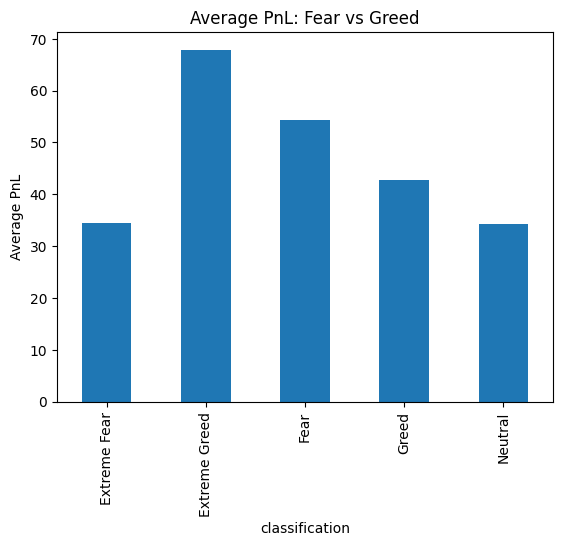

In [171]:
#Average PnL Comparison
final_df.groupby("classification")["Closed PnL"].mean().plot(kind="bar")
plt.title("Average PnL: Fear vs Greed")
plt.ylabel("Average PnL")
plt.show()

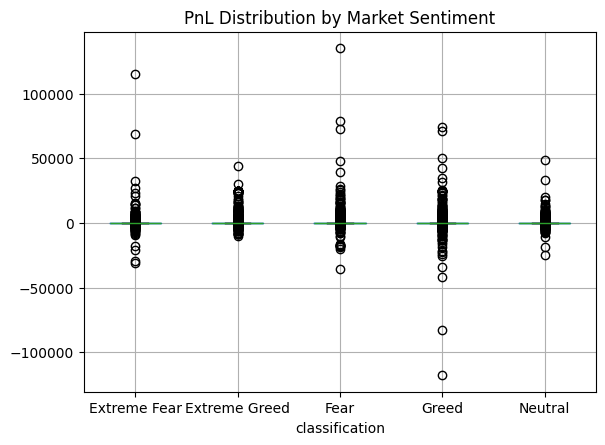

In [174]:
#PnL Distribution
final_df.boxplot(column="Closed PnL", by="classification")
plt.title("PnL Distribution by Market Sentiment")
plt.suptitle("")
plt.show()

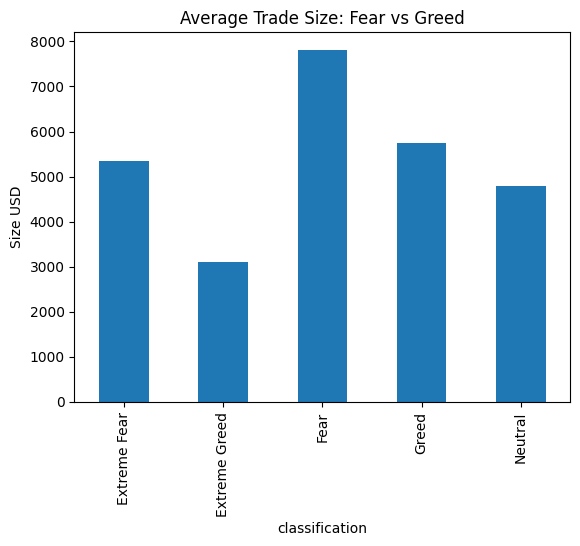

In [175]:
#Trade Size Comparison
final_df.groupby("classification")["Size USD"].mean().plot(kind="bar")
plt.title("Average Trade Size: Fear vs Greed")
plt.ylabel("Size USD")
plt.show()

The analysis shows that traders tend to take larger and riskier positions during Greed phases, resulting in higher volatility in profits and losses. In contrast, Fear periods are associated with more conservative trading behavior and relatively stable outcomes. This confirms that market sentiment plays a significant role in influencing trader risk-taking and performance.